In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

## Анализ данных

In [ ]:
df = pd.read_csv('linear_regression.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.shape

(300153, 11)

In [ ]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
#ищем самую популярную авиакомпанию

df.groupby(['airline']).count()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
AirAsia,16098,16098,16098,16098,16098,16098,16098,16098,16098,16098
Air_India,80892,80892,80892,80892,80892,80892,80892,80892,80892,80892
GO_FIRST,23173,23173,23173,23173,23173,23173,23173,23173,23173,23173
Indigo,43120,43120,43120,43120,43120,43120,43120,43120,43120,43120
SpiceJet,9011,9011,9011,9011,9011,9011,9011,9011,9011,9011
Vistara,127859,127859,127859,127859,127859,127859,127859,127859,127859,127859


In [ ]:
#распредление по классу полета
df.groupby(['class']).count()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
class,,,,,,,,,,
Business,93487,93487,93487,93487,93487,93487,93487,93487,93487,93487
Economy,206666,206666,206666,206666,206666,206666,206666,206666,206666,206666


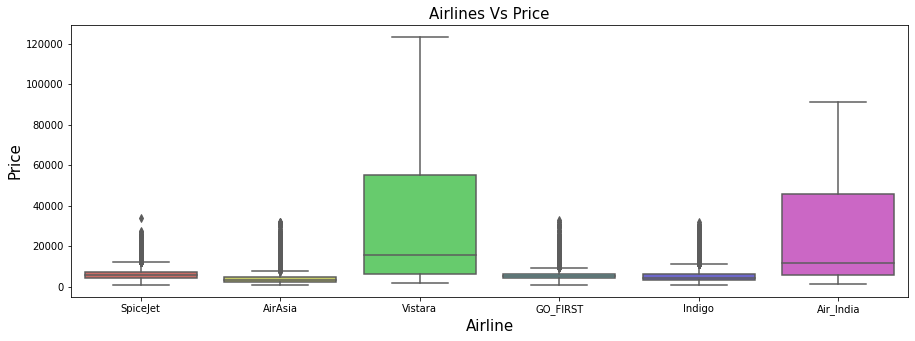

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

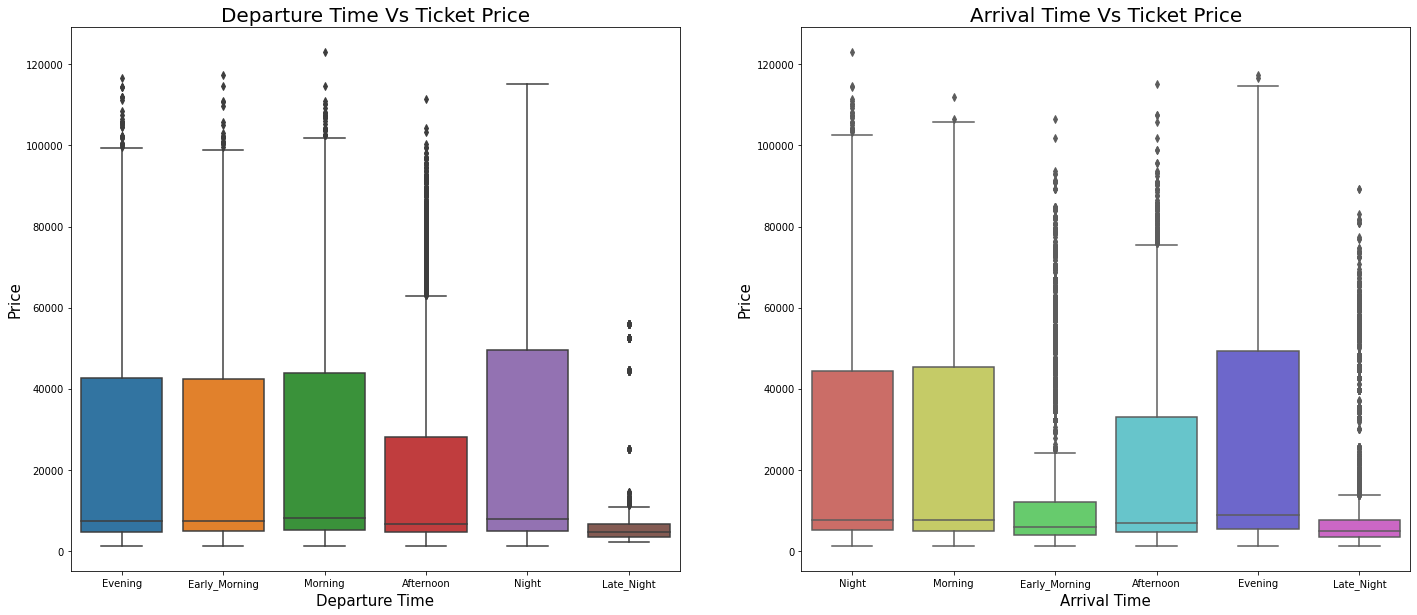

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Простая линейная регрессия для одного признака

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
##игрушечный пример

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df_toy = df[['duration', 'price']]
df_toy.head()

,duration,price
0,2.17,5953
1,2.33,5953
2,2.17,5956
3,2.25,5955
4,2.33,5955


In [ ]:
y_df_toy = df_toy['price']
X_df_toy = df_toy.drop(['price'], axis=1)

In [ ]:
y_df_toy.shape

(300153,)

In [ ]:
X_df_toy.shape

(300153, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df_toy, y_df_toy,  test_size = 0.3, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

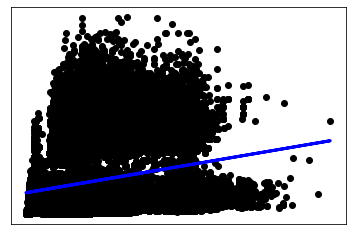

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test,y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#y  = kx+b
# y  = 639.99 * x + 13080.31

In [ ]:
print(f"Coef: {model.coef_}")

Coef: [639.99654686]


In [ ]:
print(f"Intercept: {model.intercept_}")

Intercept: 13080.319307577563


## Множественная линейная регрессия

In [ ]:
cat_columns = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class']

In [ ]:
df = pd.get_dummies(df, columns = cat_columns)

In [ ]:
df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


In [ ]:
y = df['price']
X = df.drop(['price'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#y = b + k1*x1 + k2*x2 + ... kn*xn

In [ ]:
print(f"Coef: {model.coef_}")

Coef: [ 5.67891061e+01 -1.27256423e+02 -1.21635803e+13 ... -9.10991564e+12
  1.75750863e+13  1.75750863e+13]


In [ ]:
print(f"Intercept: {model.intercept_}")

Intercept: -129560310471495.78


## Метрики

In [ ]:
#считаем метрики mae, mse, rmse, r2

In [ ]:
df2  = pd.DataFrame(
    {
        'gt': y_test,
        'pred': y_pred
    }
)

In [ ]:
df2.head()

,gt,pred
27131,7366,6335.40625
266857,64831,56319.65625
141228,6195,12883.25000
288329,60160,53588.31250
97334,6578,11071.25000


In [ ]:
df2['diff'] = df2['gt'] - df2['pred']
df2.head()

,gt,pred,diff
27131,7366,6335.40625,1030.59375
266857,64831,56319.65625,8511.34375
141228,6195,12883.25000,-6688.25000
288329,60160,53588.31250,6571.68750
97334,6578,11071.25000,-4493.25000


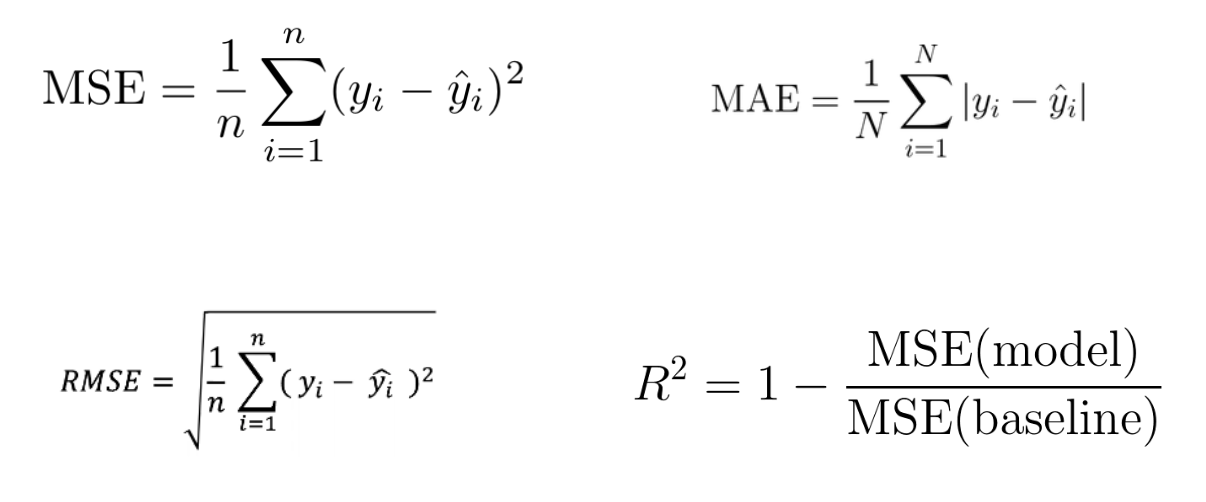

In [ ]:
df2['pred_squared'] = (df2['gt'] - df2['pred']) ** 2
df2['pred_squared'].mean()

2.244989796874995e+20

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df2['gt'], df2['pred'])

2.244989796874995e+20

In [ ]:
y = range(1,11)
y_pred  = [1,3,5,8,14,12,6,7,2,19]
mean_squared_error(y, y_pred)

27.0

In [ ]:
y = range(1001,1011)
y_pred  = [1001,1003,1005,1008,1014,1012,1006,1007,1002,1019]
mean_squared_error(y, y_pred)

27.0

In [ ]:
df2['avg']  = df2['gt'].mean()
df2['avg']

27131     20874.98141
266857    20874.98141
141228    20874.98141
288329    20874.98141
97334     20874.98141
             ...     
123895    20874.98141
251253    20874.98141
8335      20874.98141
68668     20874.98141
108970    20874.98141
Name: avg, Length: 90046, dtype: float64

In [ ]:
mse_b = mean_squared_error(df2['gt'], df2['avg'])
mse_b

514666501.72663844

In [ ]:
mse_a = mean_squared_error(df2['gt'], df2['pred'])
mse_a

2.244989796874995e+20

In [ ]:
r2 = 1 - (mse_a/mse_b)
r2

-436202820532.9476

## Регуляризация

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
#попробовать регуляризацию и посмотреть, как изменятся метрики при этом

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
df_ridge  = pd.DataFrame(
    {
        'gt': y_test,
        'pred': y_pred
    }
)
df_ridge.head()

,gt,pred
27131,7366,6328.457007
266857,64831,56215.030024
141228,6195,12889.834125
288329,60160,53570.420002
97334,6578,11056.948023


In [ ]:
#обычная линейная регресии
mean_squared_error(df2['gt'], df2['pred'])

2.244989796874995e+20

In [ ]:
#ridge
mean_squared_error(df_ridge['gt'], df_ridge['pred'])

38289074.50952167

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(df2['gt'], df2['pred'])

-436202820532.94763

In [ ]:
r2_score(df_ridge['gt'], df_ridge['pred'])

0.9256041059966661